Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
type(data_dir_train)

pathlib.PosixPath

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split= 0.2,
    label_mode='categorical',
    subset='training',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)
train_ds

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='validation',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)
val_ds

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [9]:
## Write your test dataset here
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    batch_size=32,
    image_size=(img_height,img_width),
    seed =123
)
test_ds

Found 118 files belonging to 9 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [33]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 9)


In [34]:
y_data = np.array(class_names)
y_data.shape

(9,)

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

tf.Tensor(
[[[[ 68.666664  50.625     50.708336]
   [ 77.        57.25      57.875   ]
   [ 81.583336  61.083336  51.375   ]
   ...
   [ 82.62503   57.99994   60.916626]
   [ 73.        56.25      55.375   ]
   [ 69.625015  47.624985  48.625046]]

  [[ 71.333336  50.041664  52.791668]
   [ 79.625     60.375     61.75    ]
   [ 87.458336  64.708336  67.125   ]
   ...
   [ 84.37509   58.791718  62.625153]
   [ 74.125     55.875     55.375   ]
   [ 68.41675   46.833374  47.20836 ]]

  [[ 74.25      56.041668  56.625   ]
   [ 86.        67.75      70.5     ]
   [ 93.625     72.125     76.45833 ]
   ...
   [ 87.91675   64.79178   59.291656]
   [ 80.5       56.75      58.875   ]
   [ 70.625015  51.125015  49.25    ]]

  ...

  [[ 46.416668  27.75      29.083334]
   [ 43.25      27.375     27.25    ]
   [ 43.791668  25.083334  24.416668]
   ...
   [ 33.        19.        17.333374]
   [ 35.        21.        17.875   ]
   [ 33.583344  19.24997   18.666656]]

  [[ 45.666668  27.        28.5416

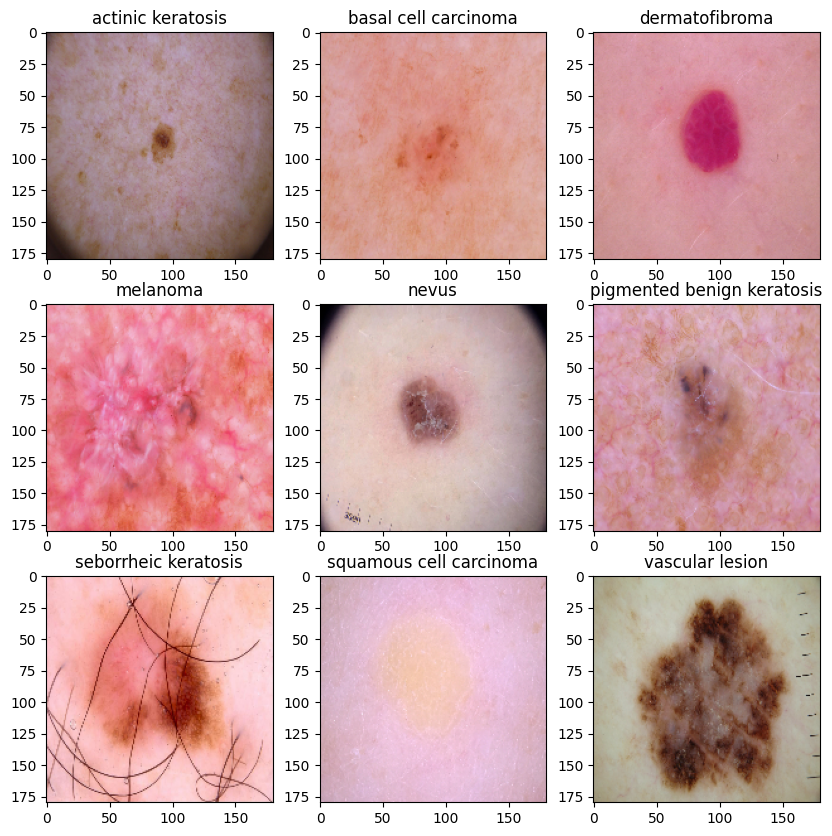

In [35]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for x, y in train_ds.take(1):
  print(x)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.asarray(x[i],dtype="int32"))
    plt.title(class_names[i])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
### Your code goes here
num_classes =9
model = Sequential()
#rescaling
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
#layer 1
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#layer4
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer5
model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [38]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_13 (Activation)  (None, 90, 90, 64)        0         
                                                      

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [39]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_13 (Activation)  (None, 90, 90, 64)        0         
                                                      

In [41]:
from plot_model import plot_model

#plot_model(model)

In [42]:
!pip3 install plot_model

In [43]:
from keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, mode='auto')

### Train the Model

In [44]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose = 1
)

Epoch 1/20


2023-08-06 15:38:43.192354: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 27 of 1000
2023-08-06 15:38:49.362190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


56/56 [==============================] - 66s 870ms/step - loss: 1.9634 - accuracy: 0.3599 - val_loss: 2.0214 - val_accuracy: 0.2864
Epoch 2/20
56/56 [==============================] - 41s 738ms/step - loss: 1.5613 - accuracy: 0.4548 - val_loss: 1.9348 - val_accuracy: 0.2931
Epoch 3/20
56/56 [==============================] - 43s 763ms/step - loss: 1.4697 - accuracy: 0.4860 - val_loss: 1.9318 - val_accuracy: 0.3490
Epoch 4/20
56/56 [==============================] - 41s 731ms/step - loss: 1.3863 - accuracy: 0.5084 - val_loss: 1.9771 - val_accuracy: 0.2237
Epoch 5/20
56/56 [==============================] - 41s 727ms/step - loss: 1.3669 - accuracy: 0.5285 - val_loss: 2.0224 - val_accuracy: 0.3490
Epoch 6/20
56/56 [==============================] - 44s 778ms/step - loss: 1.3235 - accuracy: 0.5352 - val_loss: 1.9870 - val_accuracy: 0.3244
Epoch 7/20
56/56 [==============================] - 41s 736ms/step - loss: 1.2685 - accuracy: 0.5592 - val_loss: 1.6082 - val_accuracy: 0.4966
Epoch 8/20

### From above we can see that the model is overfitting we ll see the data augumentaion to deal with the overfitting

### Visualizing training results

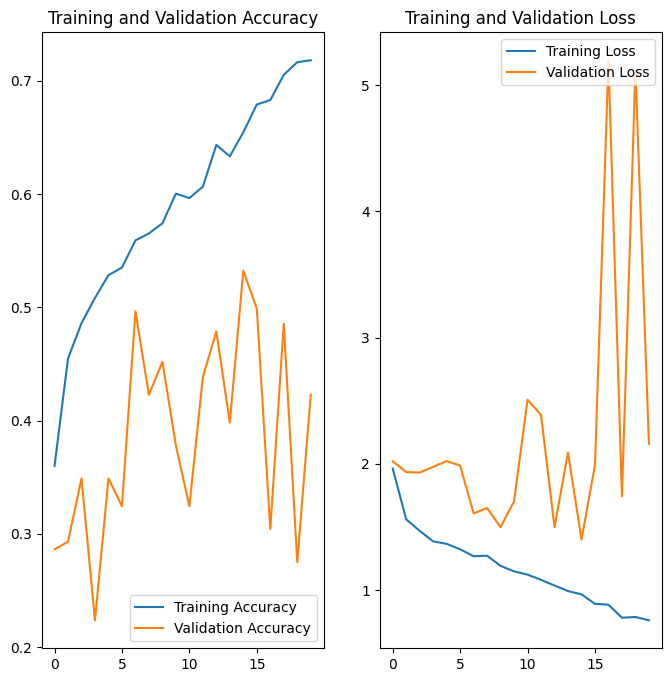

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)
loss_t, accuracy_t = model.evaluate(test_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)
print("Testing_Accuracy: ", accuracy_t)
print("testing Loss", loss_t)


Found 118 files belonging to 9 classes.
4/4 [==============================] - 4s 143ms/step - loss: 3.7377 - accuracy: 0.2542
Accuracy:  0.5541294813156128
Validation Accuracy:  0.42281877994537354
Loss:  1.2651548385620117
Validation Loss 2.1594464778900146
Testing_Accuracy:  0.2542372941970825
testing Loss 3.7377066612243652


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### - From the above results it clearly states that the model highly overfits.
### - Moreover from the plot we can also observe the loss is also bit high after 20 epocs we need to minizimze that as well.

# data augumentation strategy:
### we need to follow the image resizing , rotation, zooming, etc


In [47]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        fill_mode='nearest',  # randomly flip images
        validation_split=0.2)

datagen_val = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        fill_mode='nearest', # randomly flip images
        validation_split=0.2)

train_ds_generator = datagen_train.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    classes=class_names,
    batch_size=32,
    color_mode='rgb',
    subset='training')

validation_ds_generator = datagen_val.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    classes=class_names,
    batch_size=32,
    color_mode='rgb',
    subset='validation')

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


### Todo:
### Create the model, compile and train the model


### we will use same create model parameter which we used while creating the model without data augmentation. But we will use some overfitting dropout techniques more to our model.

In [48]:

num_classes =9
model_gen = Sequential()
#rescaling
model_gen.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
#layer 1
model_gen.add(Conv2D(32, (3, 3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))

#layer 2
model_gen.add(Conv2D(64, (3, 3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25))

#layer4
model_gen.add(Conv2D(128,(3,3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.4))

#layer5
model_gen.add(Conv2D(256,(3,3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(BatchNormalization())
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.4))


model_gen.add(Flatten())
model_gen.add(Dense(512))
model_gen.add(Activation('relu'))
model_gen.add(Dropout(0.4))
model_gen.add(Dense(num_classes))
model_gen.add(Activation('softmax'))



### Compiling the model

In [49]:
### Todo, choose an appropirate optimiser and loss function
model_gen.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [50]:
## Your code goes here, note: train your model for 20 epochs
import scipy
history = model_gen.fit(
    train_ds_generator,
    validation_data= validation_ds_generator,
    epochs=20,
    verbose=1)

Epoch 1/20
57/57 [==============================] - 66s 1s/step - loss: 2.0138 - accuracy: 0.2429 - val_loss: 2.1844 - val_accuracy: 0.2297
Epoch 2/20
57/57 [==============================] - 65s 1s/step - loss: 1.7052 - accuracy: 0.3788 - val_loss: 2.2079 - val_accuracy: 0.2500
Epoch 3/20
57/57 [==============================] - 64s 1s/step - loss: 1.6574 - accuracy: 0.4045 - val_loss: 2.1746 - val_accuracy: 0.2072
Epoch 4/20
57/57 [==============================] - 61s 1s/step - loss: 1.6193 - accuracy: 0.4139 - val_loss: 2.2698 - val_accuracy: 0.2072
Epoch 5/20
57/57 [==============================] - 62s 1s/step - loss: 1.6125 - accuracy: 0.4223 - val_loss: 2.2552 - val_accuracy: 0.2410
Epoch 6/20
57/57 [==============================] - 62s 1s/step - loss: 1.5616 - accuracy: 0.4345 - val_loss: 2.1581 - val_accuracy: 0.2207
Epoch 7/20
57/57 [==============================] - 64s 1s/step - loss: 1.6024 - accuracy: 0.4123 - val_loss: 2.1112 - val_accuracy: 0.2680
Epoch 8/20
57/57 [==

### Visualizing the results

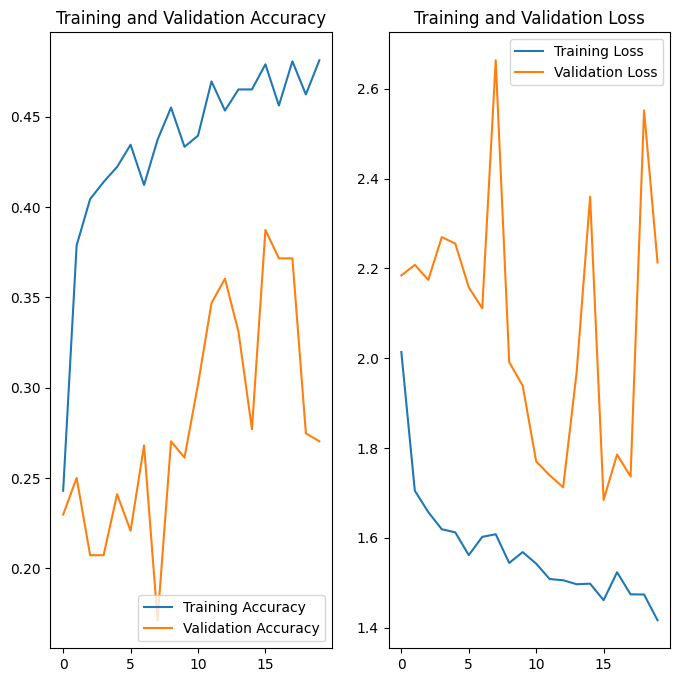

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
loss, accuracy = model_gen.evaluate(train_ds_generator, verbose=1,)
loss_v, accuracy_v = model_gen.evaluate(validation_ds_generator, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


14/14 [==============================] - 10s 700ms/step - loss: 2.1692 - accuracy: 0.2883
Accuracy:  0.37827298045158386
Validation Accuracy:  0.28828829526901245
Loss:  1.8650230169296265
Validation Loss 2.1691782474517822


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

***from the above finding we can states that there is no such improvements either by adding the dropouts or using the data resizing augmentation , the loss is increased a bit more.***

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [77]:
num=[]
train_path = data_dir_train
for label in class_names:
    path = train_path/label
    print(path)
    folder_data = len(list(path.glob('*.jpg')))
    num.append(folder_data)
    print('there are ', folder_data,' images in ', label, 'class')

Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
there are  114  images in  actinic keratosis class
Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
there are  376  images in  basal cell carcinoma class
Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
there are  95  images in  dermatofibroma class
Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
there are  438  images in  melanoma class
Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
there are  357  images in  nevus class
Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
there are  462  images in  pigmented benign keratosis class
Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
there are  77  images in  seborrheic keratosis class
Skin cancer ISIC The International Skin Imaging Collaboration

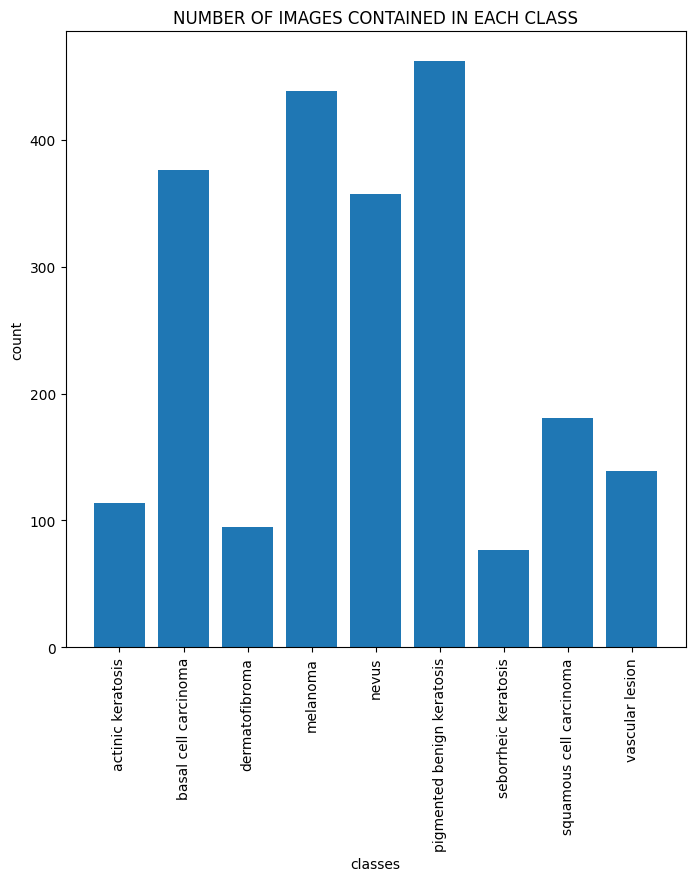

In [79]:
plt.figure(figsize = (8,8))
plt.bar(class_names, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - *** Seborrheic keratosis has a least samples ***
#### - Which classes dominate the data in terms proportionate number of samples?
#### - *** pigmented benign keratosis has a max samples ***


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [80]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [82]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset/i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x152BE4310>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x152EC75E0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=965x649 at 0x152EDCD00>: 100%|█|


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x152EDC2E0>: 100%|█


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x152DAEA70>: 100%|█


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x174B0D480>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x152E98F40>: 100%|█|


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [83]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [86]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010631.jpg_363de0db-d25d-4409-b51d-9d8269f8a3ff.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000412.jpg_4762bb86-f975-4d82-9a75-b33315d10c1e.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011163.jpg_b447f30c-1370-40eb-8c89-111d9ac0cd89.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010767.jpg_0ca72259-11bc-41c0-b370-4b00e34cb9c0.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0001143.jpg_6a612a62-8236-49bc-b9b6-7cb925f1139b.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000174.jpg_31aeb718-2e92-4735-b181-f51228a42315.jpg',
 'Skin cancer IS

In [87]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [89]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [91]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [92]:
new_df['Label'].value_counts()

Label
melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [9]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [11]:
data_dir_train= pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")

train_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [12]:
val_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
### Your code goes here
num_classes =9
model_bal = Sequential()
# #rescaling
# model_bal.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
#layer 1
model_bal.add(Conv2D(32, (3, 3), padding='same',input_shape=(180, 180, 3)))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))


#layer 2
model_bal.add(Conv2D(64, (3, 3), padding='same'))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))
model_bal.add(Dropout(0.4))


#layer4
model_bal.add(Conv2D(128,(3,3), padding='same'))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))
model_bal.add(Dropout(0.4))


#layer5
model_bal.add(Conv2D(256,(3,3), padding='same'))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))
model_bal.add(Dropout(0.4))


model_bal.add(Flatten())
model_bal.add(Dense(512))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(Dropout(0.4))
model_bal.add(Dense(num_classes))
model_bal.add(Activation('softmax'))

In [14]:
model_bal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 180, 180, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 90, 90, 64)        0

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [15]:
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import ReduceLROnPlateau
# from keras.utils.np_utils import to_categorical

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False)

model_bal.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

#### **Todo:**  Visualize the model results

#### **Todo:**  Train your model

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=5, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

history = model_bal.fit(
    train_ds_bal,
    validation_data= val_ds_bal,
    epochs=50,
    callbacks=[learning_rate_reduction])

Epoch 1/50
169/169 [==============================] - 177s 1s/step - loss: 1.8275 - accuracy: 0.3915 - val_loss: 2.0763 - val_accuracy: 0.3066 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 213s 1s/step - loss: 1.4261 - accuracy: 0.4941 - val_loss: 1.3335 - val_accuracy: 0.5375 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 203s 1s/step - loss: 1.2070 - accuracy: 0.5662 - val_loss: 10.5358 - val_accuracy: 0.2710 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 219s 1s/step - loss: 1.1100 - accuracy: 0.5948 - val_loss: 1.2129 - val_accuracy: 0.5924 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 248s 1s/step - loss: 0.9165 - accuracy: 0.6677 - val_loss: 7.3347 - val_accuracy: 0.4209 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 219s 1s/step - loss: 0.8078 - accuracy: 0.7072 - val_loss: 1.9425 - val_accuracy: 0.5122 - lr: 0.0010
Epoch 7/50
169/169 [==============================] - 224s 1s/s

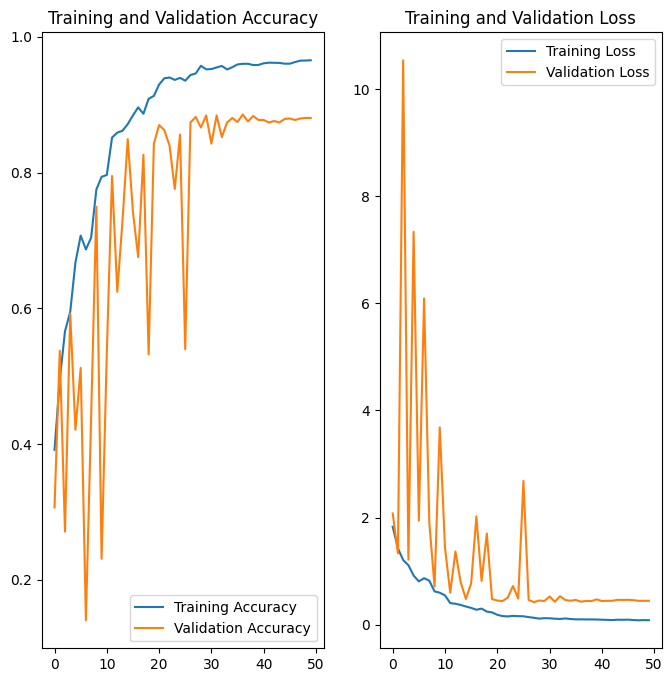

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 50
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### - In the final model, there is no sign of underfitting/overfitting.
### - Class rebalanced improved the model performance on both training and validation data.
### - In 50 epochs, the final model is able to achieve 96% training accuracy and 88% validation accuracy.
### - The low difference between the training accuracy and validation accuracy signifies that the final CNN model is able to generalize well.
### - batch normalizsation and dropouts after each layer also helped a lot in decreasing the loss of both the trainging and validation data,

In [20]:
loss, accuracy = model_bal.evaluate(train_ds_bal, verbose=1,)
loss_v, accuracy_v = model_bal.evaluate(val_ds_bal, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 14s 299ms/step - loss: 0.4461 - accuracy: 0.8805
Accuracy:  0.9725519418716431
Validation Accuracy:  0.8804751038551331
Loss:  0.060500986874103546
Validation Loss 0.44607314467430115
